![](https://www.hdcarwallpapers.com/walls/tesla_roadster_4k-HD.jpg)

# Introduction
## Recurrent Neural Networks

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

Humans don’t start their thinking from scratch every second. As you read this essay, you understand each word based on your understanding of previous words. You don’t throw everything away and start thinking from scratch again. Your thoughts have persistence.

Traditional neural networks can’t do this, and it seems like a major shortcoming. For example, imagine you want to classify what kind of event is happening at every point in a movie. It’s unclear how a traditional neural network could use its reasoning about previous events in the film to inform later ones.

Recurrent neural networks address this issue. They are networks with loops in them, allowing information to persist.

## LSTM Networks

LSTM Networks

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work.1 They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.
LSTMs also have this chain like structure, but the repeating module has a different structure. Instead of having a single neural network layer, there are four, interacting in a very special way.

## GRU

The GRU is the newer generation of Recurrent Neural networks and is pretty similar to an LSTM. GRU’s got rid of the cell state and used the hidden state to transfer information. It also only has two gates, a reset gate and update gate.

The update gate acts similar to the forget and input gate of an LSTM. It decides what information to throw away and what new information to add.
The reset gate is another gate is used to decide how much past information to forget.

And that’s a GRU. GRU’s has fewer tensor operations; therefore, they are a little speedier to train then LSTM’s. There isn’t a clear winner which one is better. Researchers and engineers usually try both to determine which one works better for their use case.

![](https://miro.medium.com/max/1400/1*yBXV9o5q7L_CvY7quJt3WQ.png)

# Preparation

## Load dataset

https://ru.investing.com/equities/tesla-motors-historical-data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD

In [2]:
#Convert date
def to_datetime(df):
    date = datetime.strptime(df, '%d.%m.%Y')
    return date.strftime("%Y-%m-%d")

In [3]:
df = pd.read_csv('../input/tesla-stock-price-new/Price Tesla.csv', sep=';')
df['Date'] = df['Date'].apply(lambda x: to_datetime(x))
df = df.sort_values('Date').reset_index(drop=True)

In [4]:
df.head()

,Date,Price,Open,Max,Min
0,2013-03-01,6.93,7.00,7.20,6.85
1,2013-03-04,7.12,6.95,7.17,6.94
2,2013-03-05,7.33,7.20,7.38,7.16
3,2013-03-06,7.54,7.40,7.58,7.39
4,2013-03-07,7.65,7.55,7.73,7.38


In [5]:
df.shape

(1928, 5)

Select the column "Price"

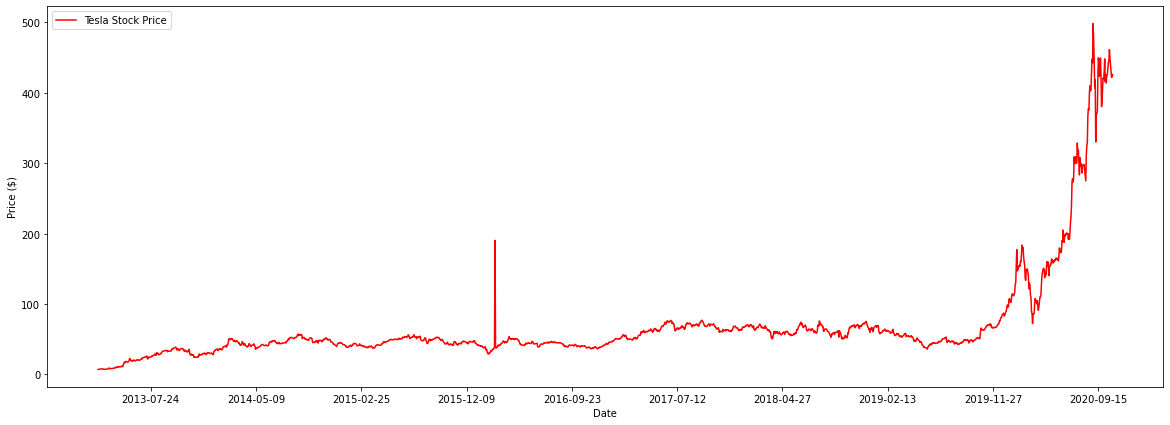

In [6]:
df['Price'] = df['Price'].astype(float)

plt.figure(figsize=(20,7))
plt.plot(df['Date'].values, df['Price'].values, label = 'Tesla Stock Price', color = 'red')
plt.xticks(np.arange(100,df.shape[0],200))
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

## Data Preprocessing

In [7]:
num_shape = 1900

train = df.iloc[:num_shape, 1:2].values
test = df.iloc[num_shape:, 1:2].values

Scaling our features using normalization. Normalizing data helps the algorithm in converging i.e. to find local/ global minimum efficiently.

In [8]:
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(train)

Now we take one row and cut it with a window of 60 elements

In [9]:
X_train = []

#Price on next day
y_train = []

window = 60

for i in range(window, num_shape):
    X_train_ = np.reshape(train_scaled[i-window:i, 0], (window, 1))
    X_train.append(X_train_)
    y_train.append(train_scaled[i, 0])
X_train = np.stack(X_train)
y_train = np.stack(y_train)

# Regression

## Recurrent Neural Network

### Training of the basic LSTM model

We'll use the LSTM for time series prediction

In [10]:
# Initializing the Recurrent Neural Network
model = Sequential()
#Adding the first LSTM layer with a sigmoid activation function and some Dropout regularization
#Units - dimensionality of the output space

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [11]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 1000, batch_size = 32);

Epoch 1/1000
58/58 [==============================] - 1s 14ms/step - loss: 0.0028
Epoch 2/1000
58/58 [==============================] - 1s 13ms/step - loss: 0.0014
Epoch 3/1000
58/58 [==============================] - 1s 13ms/step - loss: 0.0013
Epoch 4/1000
58/58 [==============================] - 1s 13ms/step - loss: 0.0016
Epoch 5/1000
58/58 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 6/1000
58/58 [==============================] - 1s 13ms/step - loss: 9.4210e-04
Epoch 7/1000
58/58 [==============================] - 1s 14ms/step - loss: 9.0246e-04
Epoch 8/1000
58/58 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 9/1000
58/58 [==============================] - 1s 13ms/step - loss: 8.7215e-04
Epoch 10/1000
58/58 [==============================] - 1s 17ms/step - loss: 9.4637e-04
Epoch 11/1000
58/58 [==============================] - 1s 14ms/step - loss: 9.4033e-04
Epoch 12/1000
58/58 [==============================] - 1s 13ms/step - loss: 

58/58 [==============================] - 1s 13ms/step - loss: 4.1524e-04
Epoch 96/1000
58/58 [==============================] - 1s 13ms/step - loss: 3.7310e-04
Epoch 97/1000
58/58 [==============================] - 1s 13ms/step - loss: 3.1584e-04
Epoch 98/1000
58/58 [==============================] - 1s 13ms/step - loss: 3.7511e-04
Epoch 99/1000
58/58 [==============================] - 1s 13ms/step - loss: 3.9123e-04
Epoch 100/1000
58/58 [==============================] - 1s 13ms/step - loss: 3.5146e-04
Epoch 101/1000
58/58 [==============================] - 1s 13ms/step - loss: 4.5478e-04
Epoch 102/1000
58/58 [==============================] - 1s 13ms/step - loss: 3.7394e-04
Epoch 103/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.9104e-04
Epoch 104/1000
58/58 [==============================] - 1s 13ms/step - loss: 4.0961e-04
Epoch 105/1000
58/58 [==============================] - 1s 13ms/step - loss: 5.3406e-04
Epoch 106/1000
58/58 [=============================

58/58 [==============================] - 1s 13ms/step - loss: 3.4241e-04
Epoch 189/1000
58/58 [==============================] - 1s 13ms/step - loss: 3.2135e-04
Epoch 190/1000
58/58 [==============================] - 1s 13ms/step - loss: 3.2951e-04
Epoch 191/1000
58/58 [==============================] - 1s 13ms/step - loss: 3.7585e-04
Epoch 192/1000
58/58 [==============================] - 1s 13ms/step - loss: 3.0512e-04
Epoch 193/1000
58/58 [==============================] - 1s 13ms/step - loss: 3.0194e-04
Epoch 194/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.7626e-04
Epoch 195/1000
58/58 [==============================] - 1s 15ms/step - loss: 4.0822e-04
Epoch 196/1000
58/58 [==============================] - 1s 16ms/step - loss: 3.5247e-04
Epoch 197/1000
58/58 [==============================] - 1s 13ms/step - loss: 3.0011e-04
Epoch 198/1000
58/58 [==============================] - 1s 13ms/step - loss: 3.0107e-04
Epoch 199/1000
58/58 [=========================

58/58 [==============================] - 1s 13ms/step - loss: 2.7218e-04
Epoch 282/1000
58/58 [==============================] - 1s 14ms/step - loss: 2.9008e-04
Epoch 283/1000
58/58 [==============================] - 1s 13ms/step - loss: 3.1085e-04
Epoch 284/1000
58/58 [==============================] - 1s 13ms/step - loss: 4.4050e-04
Epoch 285/1000
58/58 [==============================] - 1s 13ms/step - loss: 5.5332e-04
Epoch 286/1000
58/58 [==============================] - 1s 14ms/step - loss: 4.1878e-04
Epoch 287/1000
58/58 [==============================] - 1s 13ms/step - loss: 3.7888e-04
Epoch 288/1000
58/58 [==============================] - 1s 14ms/step - loss: 3.4371e-04
Epoch 289/1000
58/58 [==============================] - 1s 22ms/step - loss: 3.1505e-04
Epoch 290/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.7028e-04
Epoch 291/1000
58/58 [==============================] - 1s 13ms/step - loss: 3.7553e-04
Epoch 292/1000
58/58 [=========================

58/58 [==============================] - 1s 13ms/step - loss: 2.6836e-04
Epoch 375/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.6958e-04
Epoch 376/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.6527e-04
Epoch 377/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.8304e-04
Epoch 378/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.6838e-04
Epoch 379/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.6078e-04
Epoch 380/1000
58/58 [==============================] - 1s 14ms/step - loss: 2.7838e-04
Epoch 381/1000
58/58 [==============================] - 1s 14ms/step - loss: 2.9184e-04
Epoch 382/1000
58/58 [==============================] - 1s 14ms/step - loss: 2.3324e-04
Epoch 383/1000
58/58 [==============================] - 1s 18ms/step - loss: 2.7854e-04
Epoch 384/1000
58/58 [==============================] - 1s 16ms/step - loss: 3.4713e-04
Epoch 385/1000
58/58 [=========================

58/58 [==============================] - 1s 13ms/step - loss: 2.4111e-04
Epoch 468/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.3339e-04
Epoch 469/1000
58/58 [==============================] - 1s 14ms/step - loss: 3.2916e-04
Epoch 470/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.6037e-04
Epoch 471/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.3831e-04
Epoch 472/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.5291e-04
Epoch 473/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.3924e-04
Epoch 474/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.5481e-04
Epoch 475/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.4925e-04
Epoch 476/1000
58/58 [==============================] - 1s 17ms/step - loss: 2.6448e-04
Epoch 477/1000
58/58 [==============================] - 1s 14ms/step - loss: 2.4044e-04
Epoch 478/1000
58/58 [=========================

58/58 [==============================] - 1s 13ms/step - loss: 2.7323e-04
Epoch 561/1000
58/58 [==============================] - 1s 14ms/step - loss: 2.4460e-04
Epoch 562/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.3763e-04
Epoch 563/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.8904e-04
Epoch 564/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.4921e-04
Epoch 565/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.6587e-04
Epoch 566/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.8493e-04
Epoch 567/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.2910e-04
Epoch 568/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.1799e-04
Epoch 569/1000
58/58 [==============================] - 1s 17ms/step - loss: 2.5180e-04
Epoch 570/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.2741e-04
Epoch 571/1000
58/58 [=========================

58/58 [==============================] - 1s 15ms/step - loss: 2.3278e-04
Epoch 654/1000
58/58 [==============================] - 1s 20ms/step - loss: 2.0473e-04
Epoch 655/1000
58/58 [==============================] - 1s 16ms/step - loss: 2.2827e-04
Epoch 656/1000
58/58 [==============================] - 1s 14ms/step - loss: 2.1413e-04
Epoch 657/1000
58/58 [==============================] - 1s 14ms/step - loss: 2.5814e-04
Epoch 658/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.2656e-04
Epoch 659/1000
58/58 [==============================] - 1s 14ms/step - loss: 2.4215e-04
Epoch 660/1000
58/58 [==============================] - 1s 17ms/step - loss: 1.9066e-04
Epoch 661/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.1172e-04
Epoch 662/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.0598e-04
Epoch 663/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.1561e-04
Epoch 664/1000
58/58 [=========================

58/58 [==============================] - 1s 13ms/step - loss: 2.6796e-04
Epoch 747/1000
58/58 [==============================] - 1s 14ms/step - loss: 2.3029e-04
Epoch 748/1000
58/58 [==============================] - 1s 14ms/step - loss: 2.0523e-04
Epoch 749/1000
58/58 [==============================] - 1s 13ms/step - loss: 1.9692e-04
Epoch 750/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.2874e-04
Epoch 751/1000
58/58 [==============================] - 1s 13ms/step - loss: 1.9816e-04
Epoch 752/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.1618e-04
Epoch 753/1000
58/58 [==============================] - 1s 17ms/step - loss: 1.9261e-04
Epoch 754/1000
58/58 [==============================] - 1s 13ms/step - loss: 1.9244e-04
Epoch 755/1000
58/58 [==============================] - 1s 13ms/step - loss: 1.9598e-04
Epoch 756/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.9268e-04
Epoch 757/1000
58/58 [=========================

58/58 [==============================] - 1s 13ms/step - loss: 2.3399e-04
Epoch 840/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.6749e-04
Epoch 841/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.6954e-04
Epoch 842/1000
58/58 [==============================] - 1s 13ms/step - loss: 3.2222e-04
Epoch 843/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.1894e-04
Epoch 844/1000
58/58 [==============================] - 1s 13ms/step - loss: 1.8780e-04
Epoch 845/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.1623e-04
Epoch 846/1000
58/58 [==============================] - 1s 15ms/step - loss: 1.8507e-04
Epoch 847/1000
58/58 [==============================] - 1s 22ms/step - loss: 1.9046e-04
Epoch 848/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.0329e-04
Epoch 849/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.1942e-04
Epoch 850/1000
58/58 [=========================

58/58 [==============================] - 1s 14ms/step - loss: 2.0248e-04
Epoch 933/1000
58/58 [==============================] - 1s 14ms/step - loss: 2.2245e-04
Epoch 934/1000
58/58 [==============================] - 1s 14ms/step - loss: 2.3615e-04
Epoch 935/1000
58/58 [==============================] - 1s 14ms/step - loss: 2.0898e-04
Epoch 936/1000
58/58 [==============================] - 1s 14ms/step - loss: 2.3836e-04
Epoch 937/1000
58/58 [==============================] - 1s 17ms/step - loss: 2.0975e-04
Epoch 938/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.6229e-04
Epoch 939/1000
58/58 [==============================] - 1s 16ms/step - loss: 1.9939e-04
Epoch 940/1000
58/58 [==============================] - 1s 13ms/step - loss: 2.4368e-04
Epoch 941/1000
58/58 [==============================] - 1s 13ms/step - loss: 1.9805e-04
Epoch 942/1000
58/58 [==============================] - 1s 17ms/step - loss: 2.0870e-04
Epoch 943/1000
58/58 [=========================

## Prediction

In [12]:
df_volume = np.vstack((train, test))

inputs = df_volume[df_volume.shape[0] - test.shape[0] - window:]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

num_2 = df_volume.shape[0] - num_shape + window

X_test = []

for i in range(window, num_2):
    X_test_ = np.reshape(inputs[i-window:i, 0], (window, 1))
    X_test.append(X_test_)
    
X_test = np.stack(X_test)

In [13]:
predict = model.predict(X_test)
predict = sc.inverse_transform(predict)

In [14]:
diff = predict - test

print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

MSE: 4840.804172281035
MAE: 63.15895608084543
RMSE: 69.5758878655604


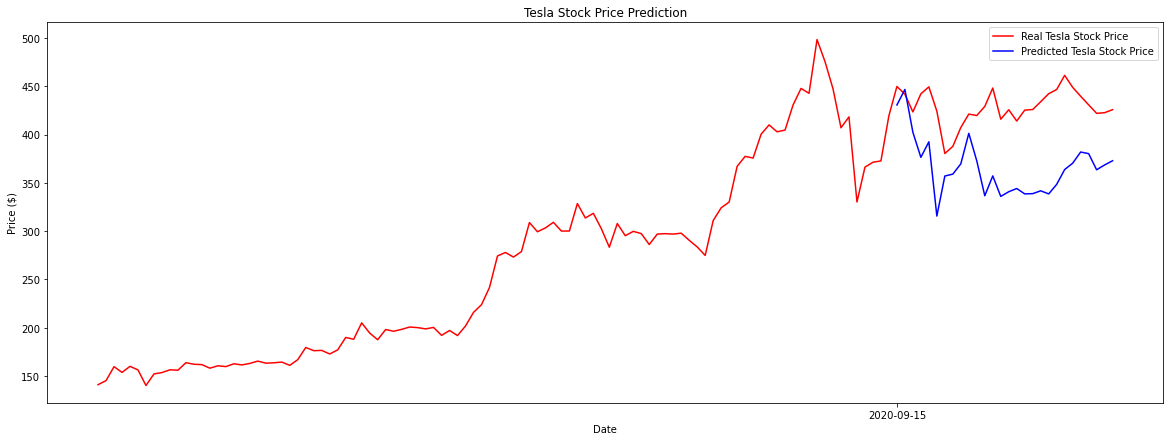

In [15]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[1800:], df_volume[1800:], color = 'red', label = 'Real Tesla Stock Price')
plt.plot(df['Date'][-predict.shape[0]:].values, predict, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.xticks(np.arange(100,df[1800:].shape[0],200))
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

### 20-day prediction

In [16]:
pred_ = predict[-1].copy()
prediction_full = []
window = 60
df_copy = df.iloc[:, 1:2][1:].values

for j in range(20):
    df_ = np.vstack((df_copy, pred_))
    train_ = df_[:num_shape]
    test_ = df_[num_shape:]
    
    df_volume_ = np.vstack((train_, test_))

    inputs_ = df_volume_[df_volume_.shape[0] - test_.shape[0] - window:]
    inputs_ = inputs_.reshape(-1,1)
    inputs_ = sc.transform(inputs_)

    X_test_2 = []

    for k in range(window, num_2):
        X_test_3 = np.reshape(inputs_[k-window:k, 0], (window, 1))
        X_test_2.append(X_test_3)

    X_test_ = np.stack(X_test_2)
    predict_ = model.predict(X_test_)
    pred_ = sc.inverse_transform(predict_)
    prediction_full.append(pred_[-1][0])
    df_copy = df_[j:]

In [17]:
prediction_full_new = np.vstack((predict, np.array(prediction_full).reshape(-1,1)))

In [18]:
df_date = df[['Date']]

for h in range(20):
    df_date_add = pd.to_datetime(df_date['Date'].iloc[-1]) + pd.DateOffset(days=1)
    df_date_add = pd.DataFrame([df_date_add.strftime("%Y-%m-%d")], columns=['Date'])
    df_date = df_date.append(df_date_add)
df_date = df_date.reset_index(drop=True)

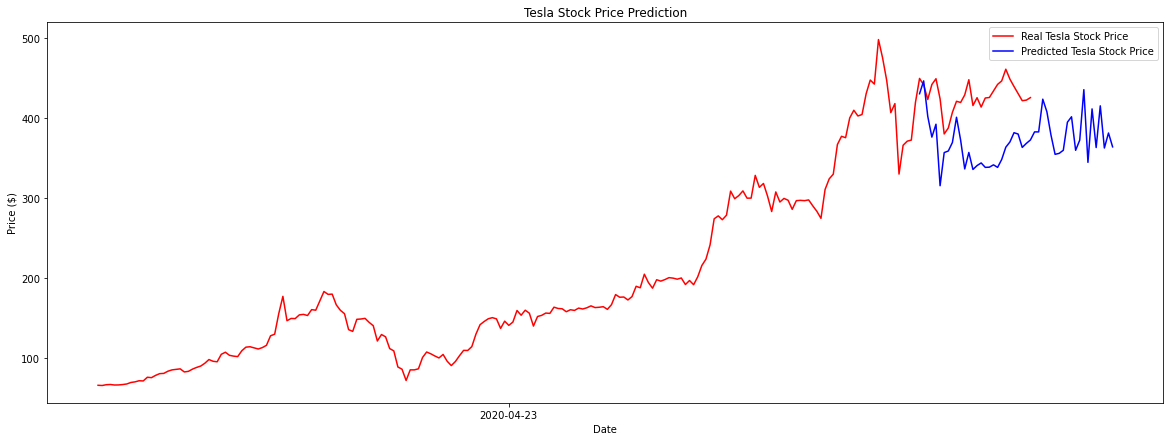

In [19]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[1700:], df_volume[1700:], color = 'red', label = 'Real Tesla Stock Price')
plt.plot(df_date['Date'][-prediction_full_new.shape[0]:].values, prediction_full_new, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.xticks(np.arange(100,df[1700:].shape[0],200))
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# GRU

In [20]:
# The GRU architecture
modelGRU = Sequential()

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=1))
modelGRU.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 60, 50)            7950      
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 60, 50)            15300     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 60, 50)            15300     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 50)               

In [21]:
modelGRU.compile(optimizer='sgd', loss='mean_squared_error')
modelGRU.fit(X_train, y_train, epochs=1000, batch_size=16)

Epoch 1/1000
115/115 [==============================] - 1s 11ms/step - loss: 0.0103
Epoch 2/1000
115/115 [==============================] - 1s 10ms/step - loss: 0.0093
Epoch 3/1000
115/115 [==============================] - 1s 10ms/step - loss: 0.0083
Epoch 4/1000
115/115 [==============================] - 1s 12ms/step - loss: 0.0073
Epoch 5/1000
115/115 [==============================] - 1s 11ms/step - loss: 0.0064
Epoch 6/1000
115/115 [==============================] - 1s 12ms/step - loss: 0.0050
Epoch 7/1000
115/115 [==============================] - 1s 13ms/step - loss: 0.0046
Epoch 8/1000
115/115 [==============================] - 1s 12ms/step - loss: 0.0036
Epoch 9/1000
115/115 [==============================] - 1s 11ms/step - loss: 0.0028
Epoch 10/1000
115/115 [==============================] - 1s 11ms/step - loss: 0.0023
Epoch 11/1000
115/115 [==============================] - 1s 10ms/step - loss: 0.0018
Epoch 12/1000
115/115 [==============================] - 1s 10ms/step - lo

115/115 [==============================] - 1s 13ms/step - loss: 7.5093e-04
Epoch 94/1000
115/115 [==============================] - 1s 12ms/step - loss: 6.8331e-04
Epoch 95/1000
115/115 [==============================] - 1s 11ms/step - loss: 8.4046e-04
Epoch 96/1000
115/115 [==============================] - 2s 14ms/step - loss: 6.5565e-04
Epoch 97/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.8906e-04
Epoch 98/1000
115/115 [==============================] - 1s 13ms/step - loss: 8.4559e-04
Epoch 99/1000
115/115 [==============================] - 1s 11ms/step - loss: 6.9020e-04
Epoch 100/1000
115/115 [==============================] - 1s 11ms/step - loss: 6.9054e-04
Epoch 101/1000
115/115 [==============================] - 1s 10ms/step - loss: 7.8409e-04
Epoch 102/1000
115/115 [==============================] - 2s 13ms/step - loss: 6.8698e-04
Epoch 103/1000
115/115 [==============================] - 1s 11ms/step - loss: 7.0246e-04
Epoch 104/1000
115/115 [=======

115/115 [==============================] - 1s 10ms/step - loss: 6.6206e-04
Epoch 185/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.4155e-04
Epoch 186/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.7849e-04
Epoch 187/1000
115/115 [==============================] - 1s 11ms/step - loss: 6.0831e-04
Epoch 188/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.4256e-04
Epoch 189/1000
115/115 [==============================] - 1s 12ms/step - loss: 7.5502e-04
Epoch 190/1000
115/115 [==============================] - 1s 13ms/step - loss: 6.5843e-04
Epoch 191/1000
115/115 [==============================] - 1s 11ms/step - loss: 6.3211e-04
Epoch 192/1000
115/115 [==============================] - 1s 10ms/step - loss: 7.2071e-04
Epoch 193/1000
115/115 [==============================] - 1s 12ms/step - loss: 7.0403e-04
Epoch 194/1000
115/115 [==============================] - 1s 11ms/step - loss: 7.5428e-04
Epoch 195/1000
115/115 [=

115/115 [==============================] - 1s 10ms/step - loss: 6.7501e-04
Epoch 276/1000
115/115 [==============================] - 1s 11ms/step - loss: 6.5178e-04
Epoch 277/1000
115/115 [==============================] - 1s 12ms/step - loss: 7.4497e-04
Epoch 278/1000
115/115 [==============================] - 1s 12ms/step - loss: 7.8014e-04
Epoch 279/1000
115/115 [==============================] - 1s 10ms/step - loss: 7.3878e-04
Epoch 280/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.8255e-04
Epoch 281/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.1436e-04
Epoch 282/1000
115/115 [==============================] - 1s 10ms/step - loss: 5.9107e-04
Epoch 283/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.0310e-04
Epoch 284/1000
115/115 [==============================] - 1s 10ms/step - loss: 7.5470e-04
Epoch 285/1000
115/115 [==============================] - 1s 10ms/step - loss: 7.8110e-04
Epoch 286/1000
115/115 [=

115/115 [==============================] - 1s 10ms/step - loss: 6.2271e-04
Epoch 367/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.6042e-04
Epoch 368/1000
115/115 [==============================] - 1s 11ms/step - loss: 7.5263e-04
Epoch 369/1000
115/115 [==============================] - 1s 12ms/step - loss: 6.1525e-04
Epoch 370/1000
115/115 [==============================] - 1s 10ms/step - loss: 7.9075e-04
Epoch 371/1000
115/115 [==============================] - 1s 10ms/step - loss: 7.6953e-04
Epoch 372/1000
115/115 [==============================] - 1s 11ms/step - loss: 7.8620e-04
Epoch 373/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.5948e-04
Epoch 374/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.1752e-04
Epoch 375/1000
115/115 [==============================] - 1s 10ms/step - loss: 5.9180e-04
Epoch 376/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.9411e-04
Epoch 377/1000
115/115 [=

115/115 [==============================] - 1s 10ms/step - loss: 5.2208e-04
Epoch 458/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.1401e-04
Epoch 459/1000
115/115 [==============================] - 1s 12ms/step - loss: 5.6069e-04
Epoch 460/1000
115/115 [==============================] - 1s 10ms/step - loss: 5.6845e-04
Epoch 461/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.4765e-04
Epoch 462/1000
115/115 [==============================] - 1s 13ms/step - loss: 6.1562e-04
Epoch 463/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.7816e-04
Epoch 464/1000
115/115 [==============================] - 1s 11ms/step - loss: 5.1052e-04
Epoch 465/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.1723e-04
Epoch 466/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.3330e-04
Epoch 467/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.9476e-04
Epoch 468/1000
115/115 [=

115/115 [==============================] - 1s 10ms/step - loss: 5.9972e-04
Epoch 549/1000
115/115 [==============================] - 2s 13ms/step - loss: 7.4369e-04
Epoch 550/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.5083e-04
Epoch 551/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.3575e-04
Epoch 552/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.2345e-04
Epoch 553/1000
115/115 [==============================] - 1s 10ms/step - loss: 7.2208e-04
Epoch 554/1000
115/115 [==============================] - 1s 10ms/step - loss: 5.6940e-04
Epoch 555/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.3113e-04
Epoch 556/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.5568e-04
Epoch 557/1000
115/115 [==============================] - 1s 10ms/step - loss: 5.9031e-04
Epoch 558/1000
115/115 [==============================] - 1s 11ms/step - loss: 6.0152e-04
Epoch 559/1000
115/115 [=

115/115 [==============================] - 1s 10ms/step - loss: 6.4278e-04
Epoch 640/1000
115/115 [==============================] - 1s 12ms/step - loss: 8.2750e-04
Epoch 641/1000
115/115 [==============================] - 1s 11ms/step - loss: 6.1992e-04
Epoch 642/1000
115/115 [==============================] - 1s 10ms/step - loss: 5.5318e-04
Epoch 643/1000
115/115 [==============================] - 1s 10ms/step - loss: 5.9884e-04
Epoch 644/1000
115/115 [==============================] - 1s 10ms/step - loss: 7.0919e-04
Epoch 645/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.9359e-04
Epoch 646/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.5733e-04
Epoch 647/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.0978e-04
Epoch 648/1000
115/115 [==============================] - 1s 13ms/step - loss: 6.6562e-04
Epoch 649/1000
115/115 [==============================] - 1s 11ms/step - loss: 6.0100e-04
Epoch 650/1000
115/115 [=

115/115 [==============================] - 1s 10ms/step - loss: 6.2059e-04
Epoch 731/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.1741e-04
Epoch 732/1000
115/115 [==============================] - 1s 11ms/step - loss: 5.5519e-04
Epoch 733/1000
115/115 [==============================] - 2s 14ms/step - loss: 5.5597e-04
Epoch 734/1000
115/115 [==============================] - 1s 11ms/step - loss: 5.7818e-04
Epoch 735/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.7134e-04
Epoch 736/1000
115/115 [==============================] - 1s 10ms/step - loss: 5.5536e-04
Epoch 737/1000
115/115 [==============================] - 1s 10ms/step - loss: 5.7521e-04
Epoch 738/1000
115/115 [==============================] - 1s 11ms/step - loss: 6.1051e-04
Epoch 739/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.4522e-04
Epoch 740/1000
115/115 [==============================] - 1s 11ms/step - loss: 6.5757e-04
Epoch 741/1000
115/115 [=

115/115 [==============================] - 1s 10ms/step - loss: 6.2314e-04
Epoch 822/1000
115/115 [==============================] - 1s 10ms/step - loss: 5.7154e-04
Epoch 823/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.3041e-04
Epoch 824/1000
115/115 [==============================] - 1s 11ms/step - loss: 5.2462e-04
Epoch 825/1000
115/115 [==============================] - 1s 10ms/step - loss: 6.2260e-04
Epoch 826/1000
115/115 [==============================] - 1s 10ms/step - loss: 7.1076e-04
Epoch 827/1000
115/115 [==============================] - 1s 13ms/step - loss: 6.0152e-04
Epoch 828/1000
115/115 [==============================] - 2s 15ms/step - loss: 5.4279e-04
Epoch 829/1000
115/115 [==============================] - 2s 13ms/step - loss: 4.7824e-04
Epoch 830/1000
115/115 [==============================] - 1s 12ms/step - loss: 5.1173e-04
Epoch 831/1000
115/115 [==============================] - 1s 11ms/step - loss: 6.0198e-04
Epoch 832/1000
115/115 [=

115/115 [==============================] - 1s 11ms/step - loss: 5.0262e-04
Epoch 913/1000
115/115 [==============================] - 1s 11ms/step - loss: 5.9677e-04
Epoch 914/1000
115/115 [==============================] - 1s 12ms/step - loss: 5.7470e-04
Epoch 915/1000
115/115 [==============================] - 1s 11ms/step - loss: 7.9988e-04
Epoch 916/1000
115/115 [==============================] - 1s 11ms/step - loss: 5.2347e-04
Epoch 917/1000
115/115 [==============================] - 1s 12ms/step - loss: 7.3388e-04
Epoch 918/1000
115/115 [==============================] - 1s 13ms/step - loss: 6.0251e-04
Epoch 919/1000
115/115 [==============================] - 2s 15ms/step - loss: 5.6676e-04
Epoch 920/1000
115/115 [==============================] - 1s 12ms/step - loss: 4.6449e-04
Epoch 921/1000
115/115 [==============================] - 2s 14ms/step - loss: 6.6839e-04
Epoch 922/1000
115/115 [==============================] - 1s 11ms/step - loss: 6.7386e-04
Epoch 923/1000
115/115 [=

In [22]:
predict = modelGRU.predict(X_test)
predict = sc.inverse_transform(predict)

In [23]:
diff = predict - test

print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

MSE: 520.481254176018
MAE: 18.13660919189453
RMSE: 22.814058257487158


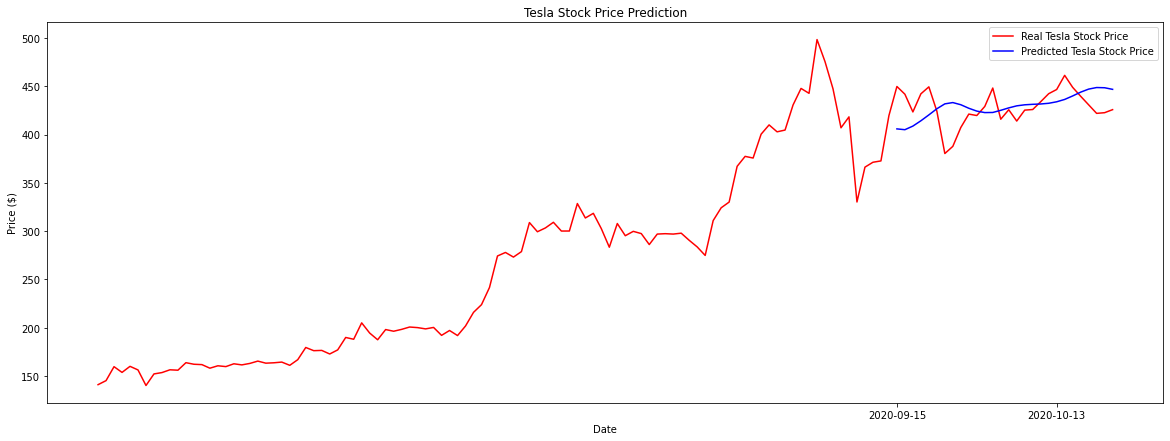

In [24]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[1800:], df_volume[1800:], color = 'red', label = 'Real Tesla Stock Price')
plt.plot(df['Date'][-predict.shape[0]:].values, predict, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.xticks(np.arange(100,df[1800:].shape[0],20))
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

### 20-day prediction

In [25]:
pred_ = predict[-1].copy()
prediction_full = []
window = 60
df_copy = df.iloc[:, 1:2][1:].values

for j in range(20):
    df_ = np.vstack((df_copy, pred_))
    train_ = df_[:num_shape]
    test_ = df_[num_shape:]
    
    df_volume_ = np.vstack((train_, test_))

    inputs_ = df_volume_[df_volume_.shape[0] - test_.shape[0] - window:]
    inputs_ = inputs_.reshape(-1,1)
    inputs_ = sc.transform(inputs_)

    X_test_2 = []

    for k in range(window, num_2):
        X_test_3 = np.reshape(inputs_[k-window:k, 0], (window, 1))
        X_test_2.append(X_test_3)

    X_test_ = np.stack(X_test_2)
    predict_ = modelGRU.predict(X_test_)
    pred_ = sc.inverse_transform(predict_)
    prediction_full.append(pred_[-1][0])
    df_copy = df_[j:]

In [26]:
prediction_full_new = np.vstack((predict, np.array(prediction_full).reshape(-1,1)))

df_date = df[['Date']]

for h in range(20):
    kk = pd.to_datetime(df_date['Date'].iloc[-1]) + pd.DateOffset(days=1)
    kk = pd.DataFrame([kk.strftime("%Y-%m-%d")], columns=['Date'])
    df_date = df_date.append(kk)
df_date = df_date.reset_index(drop=True)

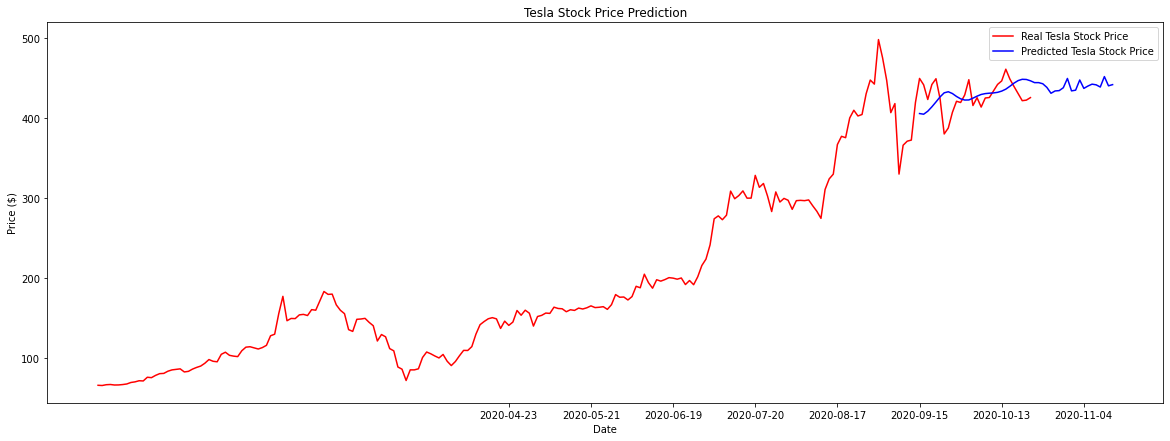

In [27]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[1700:], df_volume[1700:], color = 'red', label = 'Real Tesla Stock Price')
plt.plot(df_date['Date'][-prediction_full_new.shape[0]:].values, prediction_full_new, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.xticks(np.arange(100,df_date[1700:].shape[0],20))
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()